# Exploring the Impact of User Engagement Duration on Customer Conversion in Online Audiobook Platform

## **Problem Statement**

### The objective of this study is to assess the relationship between the duration of user engagement, measured by the time elapsed between the user's first purchase and their last visit to the platform, and customer conversion in an online audiobook platform. The analysis aims to determine whether users who engage with the platform over a longer period of time are more likely to convert into repeat customers by making additional purchases. By understanding the influence of user engagement duration on customer conversion, the platform can optimize strategies to enhance user retention and drive revenue growth.

## **Objective**

### The objective of this study is to investigate the relationship between the duration of user engagement, as indicated by the time elapsed between a user's first purchase and their last visit to the platform, and customer conversion in an online audiobook platform.


## **Research Question**

### Does the duration of user engagement, measured by the difference between the last visited date and the first purchase date, influence customer conversion in an online audiobook platform?

# 1. Importing Required Libraries

In [1]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Hypothesis Testing
# -----------------------------------
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import statsmodels.api as sm

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading the Data

In [2]:
audio_data = pd.read_csv('/content/Audiobooks_data.csv')
audio_data.head()

,ID,Booklength_overall (mins),Booklength_avg (mins),Price_overall,Price_avg,Review,Review 10/10,Minutes_listened,Completion,Support Request,Last visited minus first purchase,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


### Dataset Description

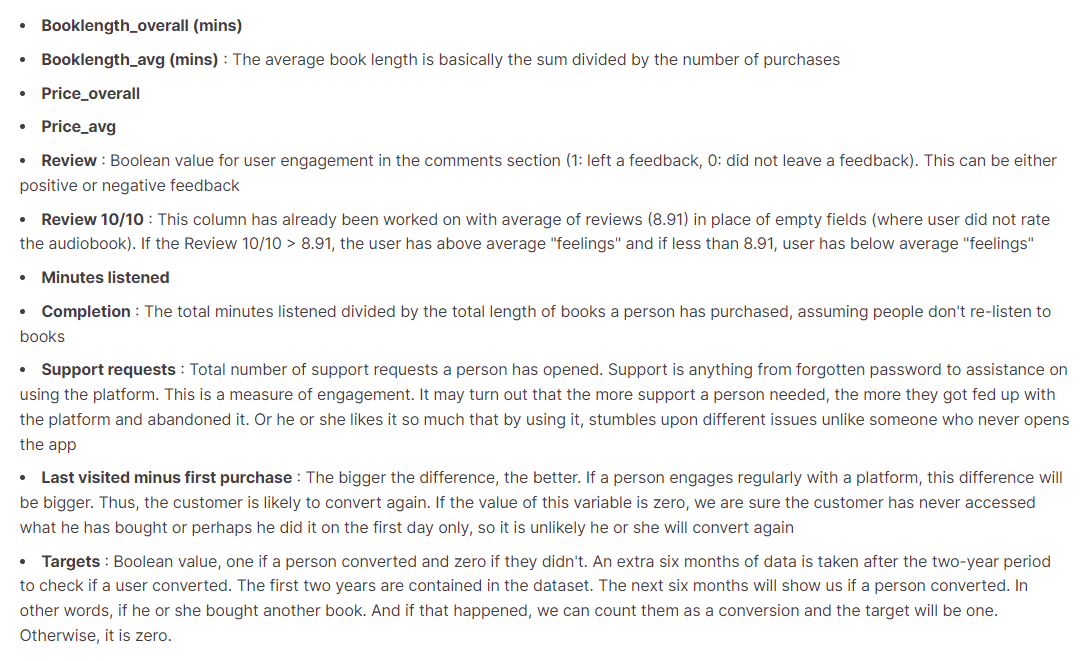

# 2. Exploratory Data Analysis (EDA)

In [3]:
audio_data.shape

(14084, 12)

In [4]:
audio_data.ID.nunique()

14084

There are so many columns in the dataset, but as per our problem statement, we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So we will simply remove those columns.


As the problem statement is revolving around the 'Last visited minus first purchase' (to measure user engagement duration), 'Targets' (to determine customer conversion), and any other factor influencing the 'Targets', we will filter the data to have only 'completion' as users who complete a higher percentage of audiobooks may be more engaged with the platform and more likely to convert, 'Support Requests' as users who open more support requests may have lower engagement durations and conversion rates, and the columns mentioned in the problem statement.

In [5]:
# Removing unwanted columns
filtered_data = audio_data.drop(columns=['ID', 'Booklength_overall (mins)', 'Booklength_avg (mins)',
                                         'Price_overall', 'Price_avg', 'Review',
                                         'Review 10/10','Minutes_listened'], axis=1)

In [6]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Completion                         14084 non-null  float64
 1   Support Request                    14084 non-null  int64  
 2   Last visited minus first purchase  14084 non-null  int64  
 3   Targets                            14084 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 440.2 KB


* No null values or object type columns

In [7]:
# Checking for duplicates
filtered_data[filtered_data.duplicated()]

,Completion,Support Request,Last visited minus first purchase,Targets
5,0.0,0,0,0
11,0.0,0,0,1
13,0.0,0,0,0
14,0.0,0,0,0
15,0.0,0,0,1
...,...,...,...,...
14076,0.0,0,0,1
14077,0.0,0,112,0
14078,0.0,0,54,0
14081,0.0,0,0,0


In [8]:
filtered_data.drop_duplicates(inplace=True)

In [9]:
print(f"After dropping duplicates, the data is left with {filtered_data.shape[0]} rows and {filtered_data.shape[1]} columns")

After dropping duplicates, the data is left with 5617 rows and 4 columns


In [10]:
# Replacing numerical values in the Targets column with categorical for better visualization and analysis
filtered_data['Targets'].replace([0, 1], ['Not Converted', 'Converted'], inplace=True)

In [11]:
# Renaming a column
filtered_data.rename(columns={'Last visited minus first purchase': 'User Engagement Duration'}, inplace=True)

In [12]:
filtered_data.describe()

,Completion,Support Request,User Engagement Duration
count,5617.000000,5617.000000,5617.000000
mean,442.166459,0.171088,113.646965
std,468.370613,0.731440,95.937993
min,0.000000,0.000000,0.000000
25%,64.800000,0.000000,26.000000
50%,291.600000,0.000000,90.000000
75%,669.600000,0.000000,190.000000
max,2160.000000,30.000000,464.000000


In [13]:
# Feature distribution plot
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Completion', '<i>Support Request',
                                                '<i>User Engagement Duration'))
fig.add_trace(go.Histogram(x=filtered_data['Completion'],name='Completion', marker_color='#330C73'),row=1,col=1)
fig.add_trace(go.Histogram(x=filtered_data['Support Request'],name='Support Request'),row=1,col=2)
fig.add_trace(go.Histogram(x=filtered_data['User Engagement Duration'],name='User Engagement Duration', marker_color='#F44D2D'),row=2,col=1)

fig.update_layout(height=800,width=800,title_text='<b>Feature Distribution')
fig.update_layout(template='ggplot2',title_x=0.5)

* The distribution analysis of various features reveals that it is significantly right skewed and some possibility of outliers.

In [14]:
  # Plot for checking outliers
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Completion', '<i>Support Request',
                                                '<i>User Engagement Duration'))

fig.add_trace(go.Box(y=filtered_data['Completion'], name='Completion', marker_color='#330C73'), row=1, col=1)
fig.add_trace(go.Box(y=filtered_data['Support Request'], name='Support Request'), row=1, col=2)
fig.add_trace(go.Box(y=filtered_data['User Engagement Duration'], name='User Engagement Duration',  marker_color='#F44D2D'), row=2, col=1)

# FIgure update
fig.update_layout(height=800,width=800,
                  title='Checking for Outliers',
                  template='ggplot2',
                  xaxis=dict(title='Feature'),
                  yaxis=dict(title='Values'))

fig.show()

* Outliers are present in the dataset, although their frequency is not significantly high across most columns. The values beyond the upper fence do not exhibit a significant deviation from the overall distribution and are consistent with the rest of the data except that one outlier in Support request.

In [15]:
filtered_data = filtered_data[filtered_data['Support Request'] < 30]

# 3. Data Visualization

In [16]:
# Defining color scheme for pie chart
colors = ["#2E425A", "#F44D2D"]

# Pie chart
fig = go.Figure(data=[go.Pie(labels=filtered_data['Targets'].value_counts().index,
                             values=filtered_data['Targets'].value_counts(),
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

# Pie chart modification
fig.update_traces(hoverinfo='label+percent', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=3)))

fig.update_layout(title='Distibution of Targets', template='ggplot2')
fig.show()

In [17]:
# Defining color scheme
colors = ['#2E425A'] * 2
colors[1] = '#F44D2D'

# Calculate total count of each category
conversion_counts = filtered_data['Targets'].value_counts()

# Create bar plot
fig_bar = go.Figure(data=[go.Bar(x=conversion_counts.index,
                 y=conversion_counts.values,
                 marker_color=colors
                 )])

# Update layout
fig_bar.update_traces(textposition='outside')
fig_bar.update_layout(template='ggplot2',
                      xaxis=dict(title='Category'),
                      yaxis=dict(title='Frequency of Category'))

# Show plot
fig_bar.show()

We have 465 conversion in total. We are interested in exploring the relationship between conversion and user behaviour concerning user engagement duration, completion rate, and support requests. Are there any clear distribution variations?

To explore this, we will plot stacked histogram to visualize the distribution to check variations between converted and non converted users.

In [18]:
# Plot for variations among user type
for column in filtered_data.columns[:3]:
  fig = px.histogram(filtered_data, x=column, color="Targets",
                     template='ggplot2', color_discrete_sequence=["#2E425A", "#F44D2D"])
  fig.update_layout(width=800, height=300)
  fig.show()

# **Some Insights**


**Majority of users show high engagement rate but have not purchased the subscription.** Some of the possible reasons could be:


* Subscription price is too high for them
* Satisfaction with free content
* Limited payment options
* Satisfied with ad-supportd model
* Trial period user
* Checking multiple audio book platforms
* May think it is not value for money




**Users who purchased the subscription plan show somewhat unexpected behaviour.** Those who purchased the subscription have 0 minutes of completion meaning they purchased soon as they joined

* Could be under trial period
* Impulse purchase / Limited-time offer / Promotional deal
* Platform exploration and whether they should get the subscription renewed
* Limited content of interest




**Also have user engagement duration between 0 to 400, although the numbers are small**

* Users may have limited time available for consuming content, leading to lower completion rate but variations in engagement durations as they might be opening the app randomly when they are free.
*  Lack of personalization can diminish the overall engagement time

Since user engagement duration and completion rate show somewhat complex relationship, it is worth exploring it further.

In [19]:
# Plotting relationship between user engagement duration and completion
fig = px.scatter(filtered_data, x="Completion", y="User Engagement Duration",
                 color="Targets", template='ggplot2',
                 color_discrete_sequence=["#2E425A", "#F44D2D"])
fig.show()

This observation underscores a peculiar trend: despite registering a completion rate of 0, users are actively engaging with the platform, as evidenced by their user engagement duration falling within the range of 0 to 400. This suggests that while users may not be consuming content to completion, they are nonetheless frequently utilizing the platform's features.

It's worth noting that user engagement duration is calculated as the difference between the last time a user accessed the platform and their initial login, indicating the frequency of their interactions. A higher engagement duration typically signifies active and sustained usage of the platform. But in this case this could be becauase they purchased the subscription and now they are only exploring the platform.





# 4. Hypothesis Testing

To ascertain the distribution of user engagement duration, we'll ude Quantile-Quantile (QQ) plots. These plots help in evaluating if user engagement duration distributions align with a normal distribution.

Alignment of data points with the diagonal line on the plot indicates conformity to a normal distribution. This assessment will provide insights into the normality of user engagement duration distributions for each target type, aiding in test selection.

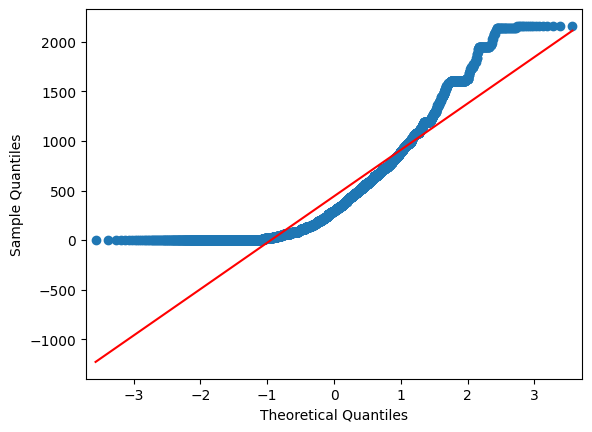

In [20]:
# Plotting qqplot to check for normality
qqplot_data = qqplot(filtered_data['Completion'], line='s').gca().lines


The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.


Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios.




### **Test Selection**

In the analysis of Exploring the Impact of User Engagement Duration on Customer Conversion in Online Audiobook Platform, where we're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., User Engagemnt by conversion type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.


`Null Hypothesis (H0)`: There is no difference in the average user engagement duration between converted and non-converted users.

`Alternative Hypothesis (H1)`: There is a difference in the average user engagement duration between converted and non-converted users.

In [21]:
filtered_data.head()


,Completion,Support Request,User Engagement Duration,Targets
0,1603.8,5,92,Not Converted
1,0.0,0,0,Not Converted
2,0.0,0,388,Not Converted
3,680.4,1,129,Not Converted
4,475.2,0,361,Not Converted


In [22]:
# Sample 1
conversion = filtered_data[filtered_data['Targets']=='Converted']['User Engagement Duration']

# Sample 2
no_conversion = filtered_data[filtered_data['Targets']=='Not Converted']['User Engagement Duration']

# Perfomring T-test on both the samples
t_stat, p_value = stats.ttest_ind(a=conversion, b=no_conversion, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
  print("\nReject the Null Hypothesis")
else:
  print("\Falied to Reject the Null Hypothesis")

T-Statistic: 11.003043538412252, P-Value: 1.4810407817722212e-25

Reject the Null Hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

We conclude that there is a statistically significant difference in the average User Engagement Duration between customers who use purchased the subscription and users who did not.

# 5. Conclusion

* Combining the findings from our initial observations and the hypothesis test, we uncover intriguing insights into user behavior and subscription dynamics in our online audiobook platform.

* Firstly, our observation reveals a prevalent trend where a majority of users exhibit high engagement rates without purchasing a subscription. This indicates a substantial potential for subscription conversion among engaged users who have yet to commit to a subscription plan.

* Furthermore, users who do opt to purchase a subscription demonstrate unexpected behavior, characterized by a lack of content completion despite their engagement. Specifically, subscribers exhibit an intriguing pattern of zero completion minutes, suggesting they may have subscribed immediately upon joining the platform.

* Additionally, our hypothesis test confirms a significant difference in average User Engagement Duration between subscribers and non-subscribers. With a p-value below the 5% significance level, we reject the null hypothesis, indicating that subscribers indeed engage differently with the platform compared to non-subscribers.

### **From a business perspective, these insights present valuable opportunities and strategic considerations:**

`Subscription Conversion Strategy:` Capitalize on the high engagement rates observed among non-subscribers by implementing targeted subscription conversion strategies. Offer compelling incentives, such as exclusive content previews, limited-time discounts, or personalized subscription recommendations, to encourage engagement and prompt users to convert to paying subscribers.

`Subscriber Engagement Optimization:` Despite the absence of content completion among subscribers, focus on enhancing subscriber engagement and retention through personalized content recommendations, interactive features, and community-building initiatives. Leverage user data to tailor content offerings and engagement strategies to align with subscriber preferences and behaviors.

`Onboarding and User Experience Enhancement:` Streamline the subscription onboarding process to provide a seamless and frictionless experience for new subscribers. Ensure clear communication of subscription benefits, pricing plans, and value propositions to facilitate informed decision-making and encourage immediate engagement post-subscription.

`Retention and Loyalty Building:` Implement retention strategies to foster long-term subscriber loyalty and maximize customer lifetime value. Offer personalized incentives, rewards programs, and exclusive perks to incentivize continued engagement and subscription renewal among existing subscribers.